## Lab08

In [2]:
import numpy as np
t = np.array([0., 1., 2., 3., 4., 5., 6.])
print(t.ndim)
print(t.shape)

1
(7,)


In [3]:
t = np.array([[1., 2., 3.], [4., 5., 6.], [7., 8., 9.]])
print(t.ndim)
print(t.shape)

2
(3, 3)


In [4]:
import tensorflow as tf
t1 = tf.constant([1, 2, 3, 4])
with tf.Session():
    print(tf.shape(t1).eval())

[4]


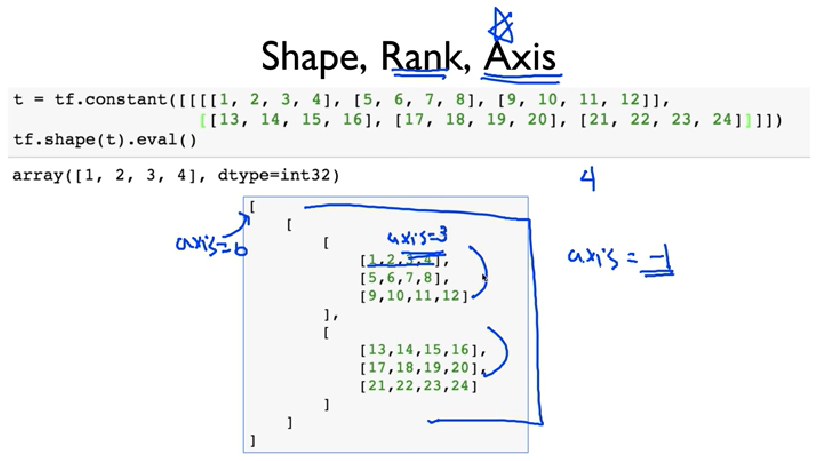

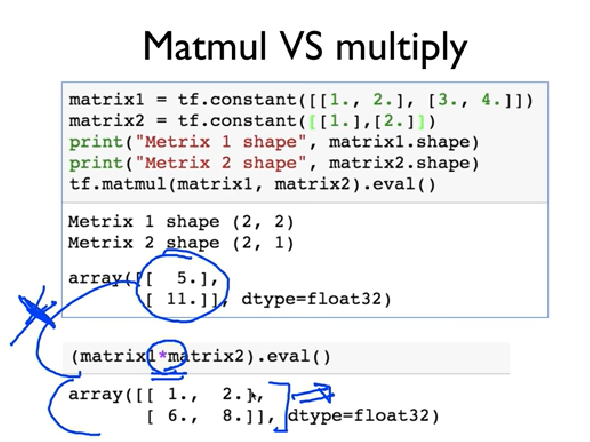

shape이 다르더라도 연산이 가능하다(Broadcastsing)

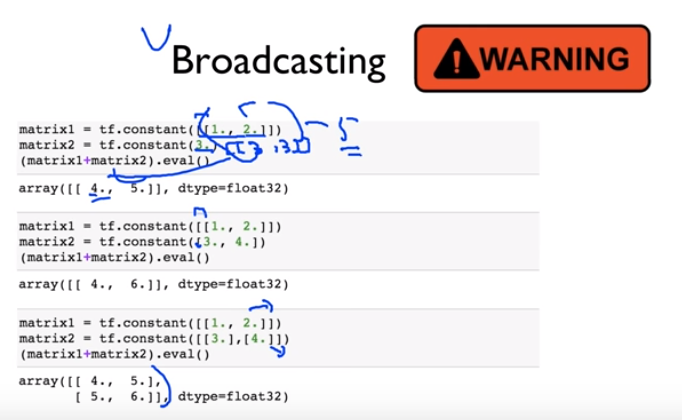

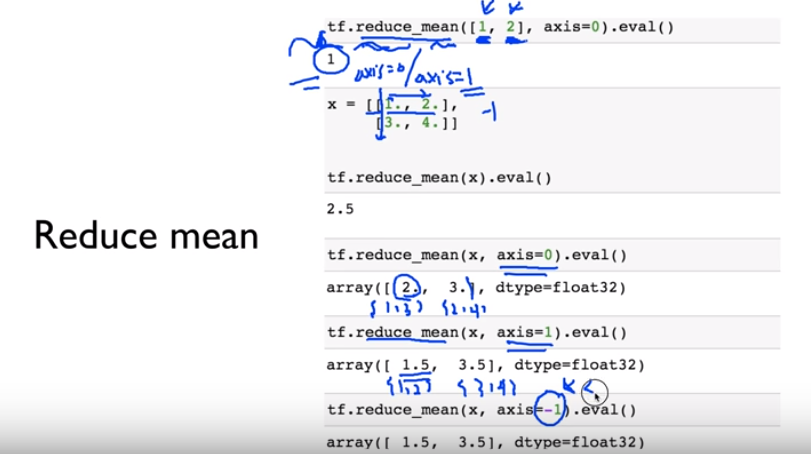

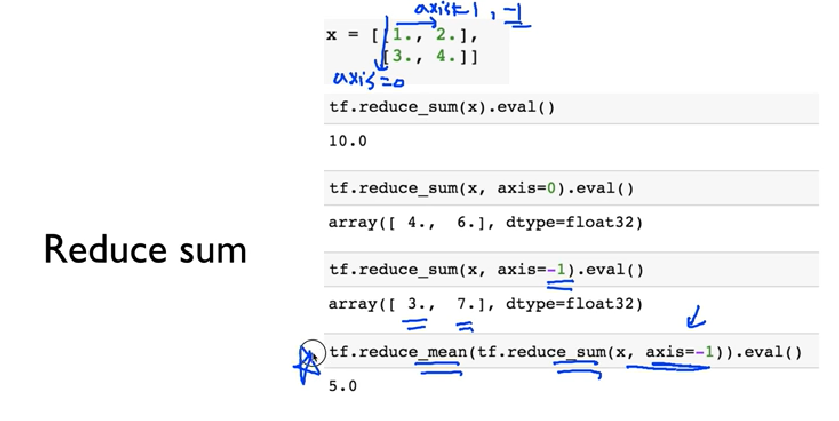

argmax는 위치를 구해준다.
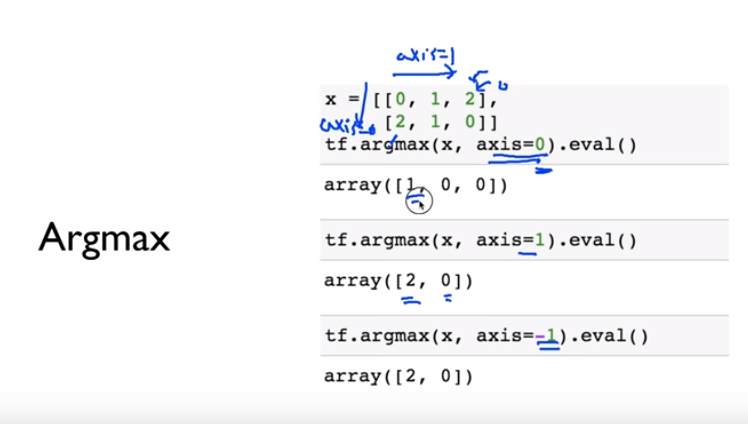

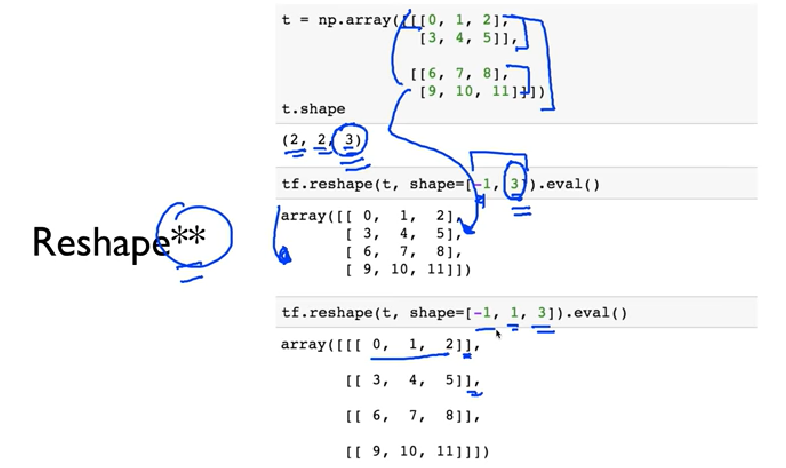

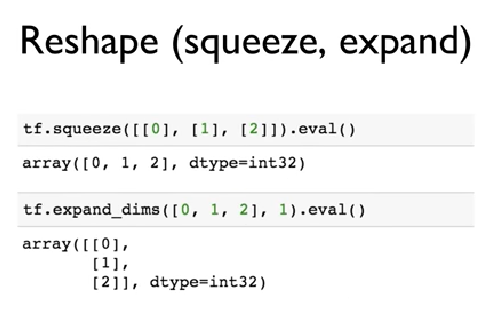

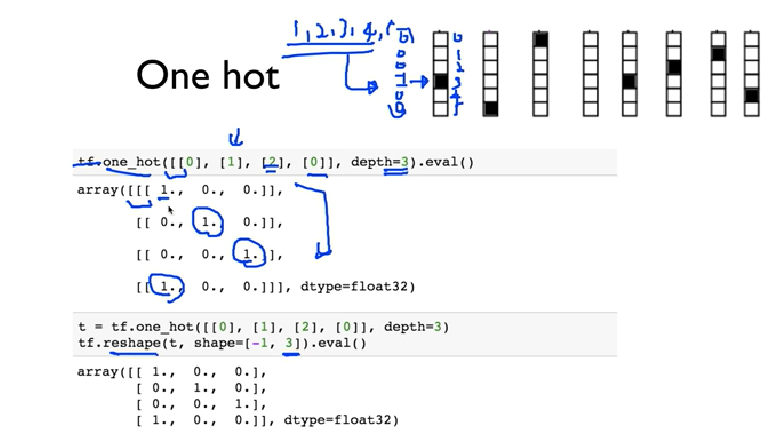

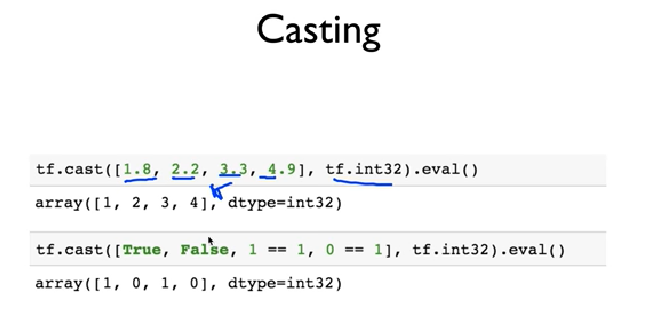

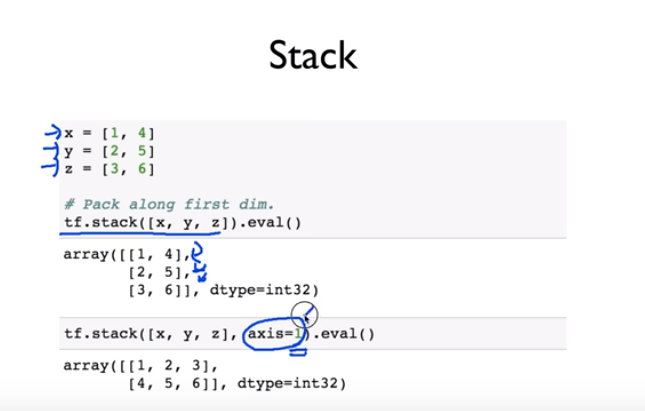

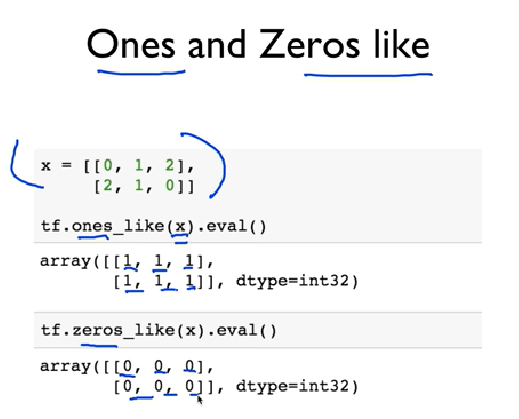

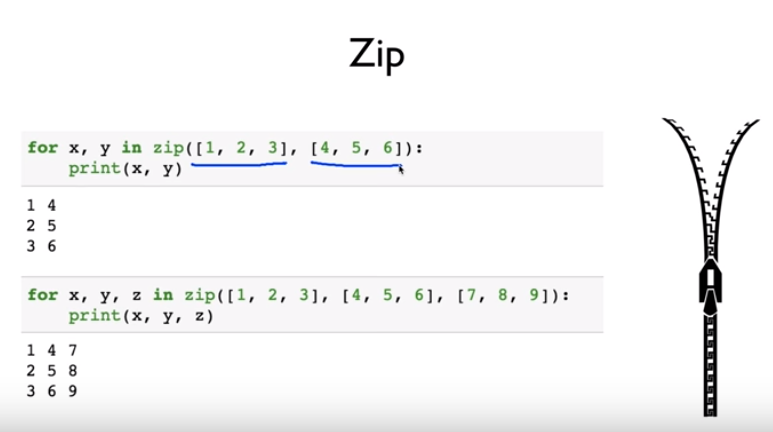

# Lec09

## Lab09

In [1]:
import tensorflow as tf
import numpy as np

learning_rate = 0.1
x_data = [[0, 0], [0, 1], [1, 0], [1, 1]]
y_data = [[0], [1], [1], [0]]

x_data = np.array(x_data, dtype=np.float32)
y_data = np.array(y_data, dtype=np.float32)

X = tf.placeholder(tf.float32, [None, 2])
Y = tf.placeholder(tf.float32, [None, 1])

W1 = tf.Variable(tf.random_normal([2, 2]), name='weight1')
b1 = tf.Variable(tf.random_normal([2]), name='bias1')
l1 = tf.sigmoid(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([2, 1]), name='weight2')
b2 = tf.Variable(tf.random_normal([1]), name='bias2')
Y_pred = tf.sigmoid(tf.matmul(l1, W2) + b2)

# cost/loss function
cost = -tf.reduce_mean(Y * tf.log(Y_pred) + (1 - Y) * tf.log(1 - Y_pred))

# Loss derivative

d_Y_pred = (Y_pred - Y) / (Y_pred * (1.0 - Y_pred) + 1e-7)


# Layer 2
d_sigma2 = Y_pred * (1 - Y_pred)
d_a2 = d_Y_pred * d_sigma2
d_p2 = d_a2
d_b2 = d_a2
d_W2 = tf.matmul(tf.transpose(l1), d_p2)

# Mean
d_b2_mean = tf.reduce_mean(d_b2, axis=[0])
d_W2_mean = d_W2 / tf.cast(tf.shape(l1)[0], dtype=tf.float32)


# Layer 1
d_l1 = tf.matmul(d_p2, tf.transpose(W2))
d_sigma1 = l1 * (1 - l1)
d_a1 = d_l1 * d_sigma1
d_b1 = d_a1
d_p1 = d_a1
d_W1 = tf.matmul(tf.transpose(X), d_a1)

# Mean
d_W1_mean = d_W1 / tf.cast(tf.shape(X)[0], dtype=tf.float32)
d_b1_mean = tf.reduce_mean(d_b1, axis=[0])

# Weight update
step = [tf.assign(W2, W2 - learning_rate * d_W2_mean), tf.assign(b2, b2 - learning_rate * d_b2_mean), tf.assign(W1, W1 - learning_rate * d_W1_mean), tf.assign(b1, b1 - learning_rate * d_b1_mean)]

# Accuracy computation
# True if hypothesis > 0.5 else False
predicted = tf.cast(Y_pred > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))


# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())
    print("shape", sess.run(tf.shape(X)[0], feed_dict={X: x_data}))
    for i in range(10001):
        sess.run([step, cost], feed_dict={X: x_data, Y: y_data})
        if i % 1000 == 0:
            print(i, sess.run([cost, d_W1], feed_dict={X: x_data, Y: y_data}), sess.run([W1, W2]))
# Accuracy report
    h, c, a = sess.run([Y_pred, predicted, accuracy], feed_dict={X: x_data, Y: y_data})
    print("\nHypothesis: ", h, "\nCorrect: ", c, "\nAccuracy: ", a)

shape 4
0 [1.227123, array([[0.17289047, 0.08303399],
       [0.17625436, 0.06979936]], dtype=float32)] [array([[-0.20265989,  0.09169416],
       [ 0.38953876,  0.75470775]], dtype=float32), array([[-0.878023  ],
       [-0.40798095]], dtype=float32)]
1000 [0.691752, array([[-0.00251948, -0.01755032],
       [-0.00100764, -0.00817626]], dtype=float32)] [array([[-0.2374256 ,  0.40752202],
       [ 0.3078303 ,  0.84554946]], dtype=float32), array([[-0.24833333],
       [ 0.5020287 ]], dtype=float32)]
2000 [0.68095636, array([[-0.00612153, -0.04059472],
       [-0.00464991, -0.03257162]], dtype=float32)] [array([[-0.14353198,  1.0935687 ],
       [ 0.36450967,  1.3037263 ]], dtype=float32), array([[-0.3831791],
       [ 0.9022162]], dtype=float32)]
3000 [0.6079202, array([[-0.0200359 , -0.06978074],
       [-0.02219106, -0.06854415]], dtype=float32)] [array([[0.16990325, 2.5011752 ],
       [0.6692298 , 2.5897858 ]], dtype=float32), array([[-0.9784789],
       [ 2.2607217]], dtype=float3

## Lab10

softmax

In [1]:
import tensorflow as tf
import random
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

learning_rate = 0.001
training_epochs = 15
batch_size = 100

X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

W = tf.Variable(tf.random_normal([784, 10]))
b = tf.Variable(tf.random_normal([10]))

hypothesis = tf.matmul(X, W) + b

# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# train my model
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch
    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels}))

# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.

Epoch: 0001 cost = 5.948871202
Epoch: 0002 cost = 1.828291238
Epoch: 0003 cost = 1.183646198
Epoch: 0004 cost

nn

In [2]:
import tensorflow as tf
import random
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

learning_rate = 0.001
training_epochs = 15
batch_size = 100

X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

W1 = tf.Variable(tf.random_normal([784, 256]))
b1 = tf.Variable(tf.random_normal([256]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)
W2 = tf.Variable(tf.random_normal([256, 256]))
b2 = tf.Variable(tf.random_normal([256]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)
W3 = tf.Variable(tf.random_normal([256, 10]))
b3 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L2, W3) + b3

# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# train my model
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch
    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels}))

# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Epoch: 0001 cost = 146.293987770
Epoch: 0002 cost = 37.104264782
Epoch: 0003 cost = 22.875257873
Epoch: 0004 cost = 15.946078149
Epoch: 0005 cost = 11.568774349
Epoch: 0006 cost = 8.479915658
Epoch: 0007 cost = 6.221098597
Epoch: 0008 cost = 4.720830483
Epoch: 0009 cost = 3.458625271
Epoch: 0010 cost = 2.595575571
Epoch: 0011 cost = 1.907025010
Epoch: 0012 cost = 1.426573832
Epoch: 0013 cost = 1.095766600
Epoch: 0014 cost = 0.813450502
Epoch: 0015 cost = 0.703238285
Accuracy: 0.9469
Label:  [2]
Prediction:  [2]


Xavier

In [3]:
tf.reset_default_graph()

X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

W1 = tf.get_variable("W1", shape=[784, 256],initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([256]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)

W2 = tf.get_variable("W2", shape=[256, 256],initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([256]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)

W3 = tf.get_variable("W3", shape=[256, 10],initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L2, W3) + b3

# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch
    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={ X: mnist.test.images, Y: mnist.test.labels}))

# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

Epoch: 0001 cost = 0.317428519
Epoch: 0002 cost = 0.112533928
Epoch: 0003 cost = 0.075225720
Epoch: 0004 cost = 0.054458114
Epoch: 0005 cost = 0.042307609
Epoch: 0006 cost = 0.031699180
Epoch: 0007 cost = 0.025088358
Epoch: 0008 cost = 0.019925463
Epoch: 0009 cost = 0.016423506
Epoch: 0010 cost = 0.014551093
Epoch: 0011 cost = 0.013670349
Epoch: 0012 cost = 0.010128398
Epoch: 0013 cost = 0.013705467
Epoch: 0014 cost = 0.009228604
Epoch: 0015 cost = 0.009337026
Accuracy: 0.9785
Label:  [1]
Prediction:  [1]


In [9]:
#deep learning (layer와 node의 수 증가시키기)
tf.reset_default_graph() 

X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

W1 = tf.get_variable('W1', shape = [784,512], initializer = tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([512]))
L1 = tf.nn.relu(tf.matmul(X,W1)+b1)

W2 = tf.get_variable('W2', shape = [512, 512],initializer = tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([512]))
L2 = tf.nn.relu(tf.matmul(L1, W2)+b2)

W3 = tf.get_variable('W3', shape = [512, 512],
                    initializer = tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([512]))
L3 = tf.nn.relu(tf.matmul(L2, W3)+b3)

W4 = tf.get_variable('W4', shape = [512, 512],initializer = tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([512]))
L4 = tf.nn.relu(tf.matmul(L3, W4)+b4)

W5 = tf.get_variable('W5', shape = [512, 10],initializer = tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L4, W5) + b5

# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch
    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))
    correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels}))

r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

Epoch: 0001 cost = 0.299444333
Epoch: 0002 cost = 0.106172641
Epoch: 0003 cost = 0.072959964
Epoch: 0004 cost = 0.053458706
Epoch: 0005 cost = 0.042887028
Epoch: 0006 cost = 0.034956947
Epoch: 0007 cost = 0.030800374
Epoch: 0008 cost = 0.026620933
Epoch: 0009 cost = 0.021842391
Epoch: 0010 cost = 0.022211345
Epoch: 0011 cost = 0.021331659
Epoch: 0012 cost = 0.016775766
Epoch: 0013 cost = 0.017382755
Epoch: 0014 cost = 0.015766298
Epoch: 0015 cost = 0.014599417
Accuracy: 0.9788
Label:  [6]
Prediction:  [6]


In [11]:
#dropout
tf.reset_default_graph() 
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

# parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

# input place holders
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

# dropout (keep_prob) rate  0.7 on training, but should be 1 for testing
keep_prob = tf.placeholder(tf.float32)
W1 = tf.get_variable("W1", shape=[784, 512],initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([512]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)
L1 = tf.nn.dropout(L1, keep_prob=keep_prob)
W2 = tf.get_variable("W2", shape=[512, 512],initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([512]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)
L2 = tf.nn.dropout(L2, keep_prob=keep_prob)
W3 = tf.get_variable("W3", shape=[512, 512],initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([512]))
L3 = tf.nn.relu(tf.matmul(L2, W3) + b3)
L3 = tf.nn.dropout(L3, keep_prob=keep_prob)
W4 = tf.get_variable("W4", shape=[512, 512],initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([512]))
L4 = tf.nn.relu(tf.matmul(L3, W4) + b4)
L4 = tf.nn.dropout(L4, keep_prob=keep_prob)
W5 = tf.get_variable("W5", shape=[512, 10],initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L4, W5) + b5

# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# train my model
for epoch in range(training_epochs):
    avg_cost = 0
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys, keep_prob: 0.7}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch
    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels, keep_prob: 1}))

r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1], keep_prob: 1}))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Epoch: 0001 cost = 0.477734828
Epoch: 0002 cost = 0.175682251
Epoch: 0003 cost = 0.128904045
Epoch: 0004 cost = 0.107885918
Epoch: 0005 cost = 0.092200071
Epoch: 0006 cost = 0.081496868
Epoch: 0007 cost = 0.070008592
Epoch: 0008 cost = 0.069238819
Epoch: 0009 cost = 0.063333851
Epoch: 0010 cost = 0.056740485
Epoch: 0011 cost = 0.057406397
Epoch: 0012 cost = 0.051014380
Epoch: 0013 cost = 0.049185799
Epoch: 0014 cost = 0.048382896
Epoch: 0015 cost = 0.045666434
Accuracy: 0.981
Label:  [0]
Prediction:  [0]
